In [1]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
#%matplotlib  #用于使图像独立显示
%matplotlib inline  

In [2]:
mpl.rcParams['axes.unicode_minus']=False       #显示负号
#采样点选择1400个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1400赫兹（即一秒内有1400个采样点，一样意思的）
x=np.linspace(0,1,1400)      
 
#设置需要采样的信号，频率分量有200，400和600
y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*400*x)+3*np.sin(2*np.pi*600*x)

In [3]:
#巴特沃斯滤波器核心模块#
Sfreq=1400 #采样频率
low,high = 200,400  #截止频率
Wn=[2*low/Sfreq,2*high/Sfreq]
b, a = signal.butter(2, Wn, 'bandpass')   #配置滤波器 2表示滤波器的阶数
data =y
filtedData = signal.filtfilt(b, a, data)  #data为要过滤的信号

<function matplotlib.pyplot.show(*args, **kw)>

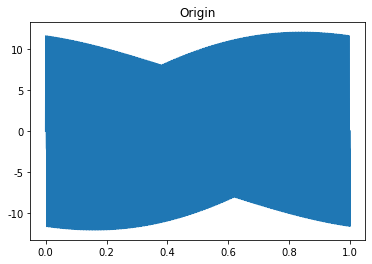

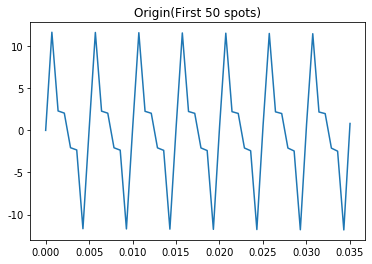

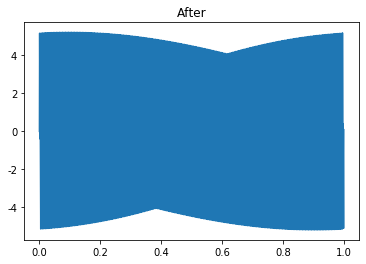

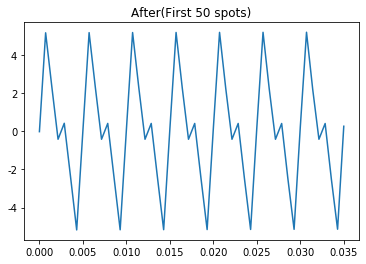

In [4]:
plt.figure()
plt.plot(x,y)   
plt.title('Origin')
 
plt.figure()
plt.plot(x[0:50],y[0:50])   
plt.title('Origin(First 50 spots)')

plt.figure()
plt.plot(x,filtedData)   
plt.title('After')

plt.figure()
plt.plot(x[0:50],filtedData[0:50])   
plt.title('After(First 50 spots)')

plt.show

In [5]:
fft_y=fft(y)  #快速傅里叶变换
fft_y1=fft(filtedData)
print(len(fft_y))
print(fft_y[0:5])

1400
[-4.18332036e-12+0.j          9.66210986e-05-0.04305756j
  3.86508070e-04-0.08611996j  8.69732036e-04-0.12919206j
  1.54641157e-03-0.17227871j]


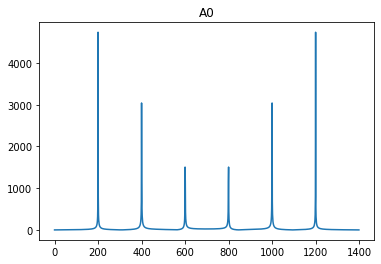

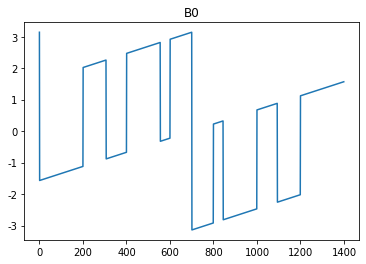

In [6]:
N=1400
x = np.arange(N)           # 频率个数
 
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)              #取复数的角度
 
plt.figure()
plt.plot(x,abs_y)   
plt.title('A0')
 
plt.figure()
plt.plot(x,angle_y)   
plt.title('B0')
plt.show()

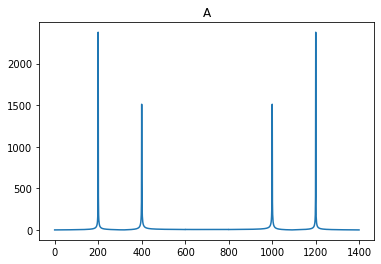

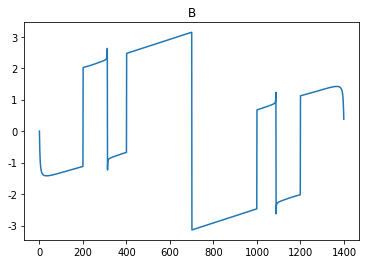

In [7]:
N=1400
x = np.arange(N)           # 频率个数
 
abs_y1=np.abs(fft_y1)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y1=np.angle(fft_y1)              #取复数的角度
 
plt.figure()
plt.plot(x,abs_y1)   
plt.title('A')
 
plt.figure()
plt.plot(x,angle_y1)   
plt.title('B')
plt.show()